In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Read_data

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,0.0,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1


#check null

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               2
Insulin                     0
BMI                         7
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#impitation_data

In [4]:
old_columns=df.columns
old_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
from sklearn.impute import SimpleImputer,KNNImputer

In [6]:
imputer=KNNImputer(n_neighbors=5)
df= imputer.fit_transform(df)

In [7]:
df=pd.DataFrame(df,columns=old_columns)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#check_duplicated

In [9]:
duplicates=df.duplicated()
sum(duplicates)

4

In [10]:
df[duplicates]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
768,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
769,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0
770,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
771,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0


In [30]:
df['Outcome'].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

#delete dumplicated 

In [11]:
df.drop_duplicates(inplace=True)

#check_correllation 

In [12]:
correlations=df.corr()
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081271,-0.073535,0.025817,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.056886,0.331357,0.230529,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.209280,0.088933,0.298733,0.041265,0.239528,0.065068
SkinThickness,-0.081271,0.056886,0.209280,1.000000,0.435935,0.388771,0.182250,-0.114870,0.073101
Insulin,-0.073535,0.331357,0.088933,0.435935,1.000000,0.205486,0.185071,-0.042163,0.130548
BMI,0.025817,0.230529,0.298733,0.388771,0.205486,1.000000,0.140185,0.054641,0.305480
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.182250,0.185071,0.140185,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.114870,-0.042163,0.054641,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.073101,0.130548,0.305480,0.173844,0.238356,1.000000


<Axes: >

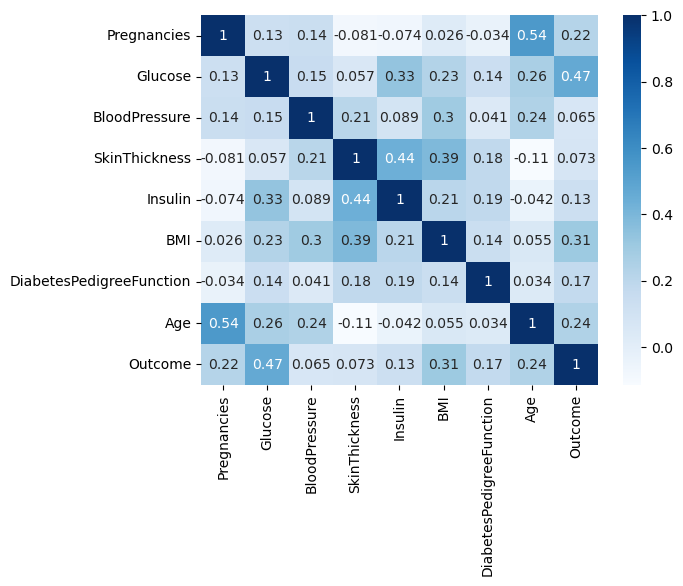

In [13]:
sns.heatmap(correlations,annot=True,cmap='Blues')

#split_data

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=.2,random_state=42)

#scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

#Grid_Search

In [17]:
from sklearn.model_selection import GridSearchCV

In [51]:
params={
    'criterion': ['entropy','gini'],
    'max_depth':[3,4,5,6,7,8,9,10],
}

model=DecisionTreeClassifier()
grid=GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [19]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6, 8]},
             scoring='accuracy')

In [20]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

#build model 

In [31]:
model=DecisionTreeClassifier(criterion='gini',max_depth=4)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

#check_overfitting 

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
y_pred_train=model.predict(x_train)
y_pred_valid=model.predict(x_valid)

In [34]:
print(f'Accuracy score on train data = {accuracy_score(y_train,y_pred_train)}')

print(f'Accuracy score on validation data = {accuracy_score(y_valid,y_pred_valid)}')

Accuracy score on train data = 0.8207739307535642
Accuracy score on validation data = 0.7073170731707317


In [52]:
# Post pruning techniques

In [54]:
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00127291 0.00132006 0.00159844 0.00162933 0.00162933
 0.00169722 0.00186694 0.00186694 0.00217244 0.00245692 0.00271555
 0.00271555 0.00303712 0.00305499 0.00317016 0.00325866 0.00325866
 0.00325866 0.00339443 0.00339443 0.00349142 0.00366732 0.00373388
 0.00378913 0.00388817 0.00396051 0.00411502 0.00465522 0.00498982
 0.00500648 0.00585568 0.0060889  0.00620696 0.00673624 0.00680834
 0.00818724 0.0096978  0.01241182 0.01423593 0.02252851 0.02973461
 0.07466067]


In [56]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

In [57]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

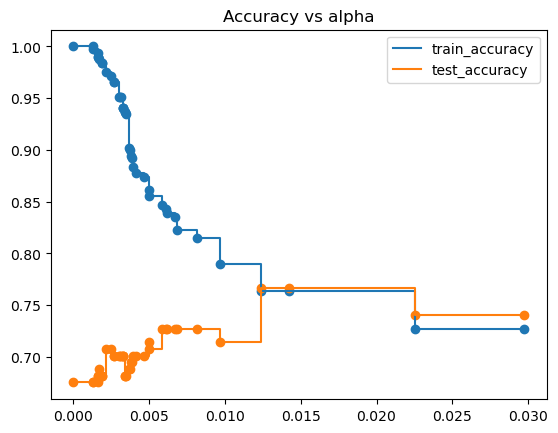

In [60]:
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [71]:
clf_ = DecisionTreeClassifier(random_state=0,ccp_alpha=0.022)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 0.7637474541751528
Test score 0.7662337662337663


In [88]:
from sklearn.tree import ExtraTreeClassifier 

In [89]:
model=ExtraTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [90]:
y_pred_train=model.predict(x_train)
y_pred_valid=model.predict(x_valid)

In [91]:
print(f'Accuracy score on train data = {accuracy_score(y_train,y_pred_train)}')

print(f'Accuracy score on validation data = {accuracy_score(y_valid,y_pred_valid)}')

Accuracy score on train data = 1.0
Accuracy score on validation data = 0.7073170731707317


In [103]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [110]:
estimators = [
              ('dt', DecisionTreeClassifier()),
              ('lg', LogisticRegression()),
            ('KNN',KNeighborsClassifier()),
            ('Dt',DecisionTreeClassifier())
    
]


clf_1 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [111]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7532467532467533


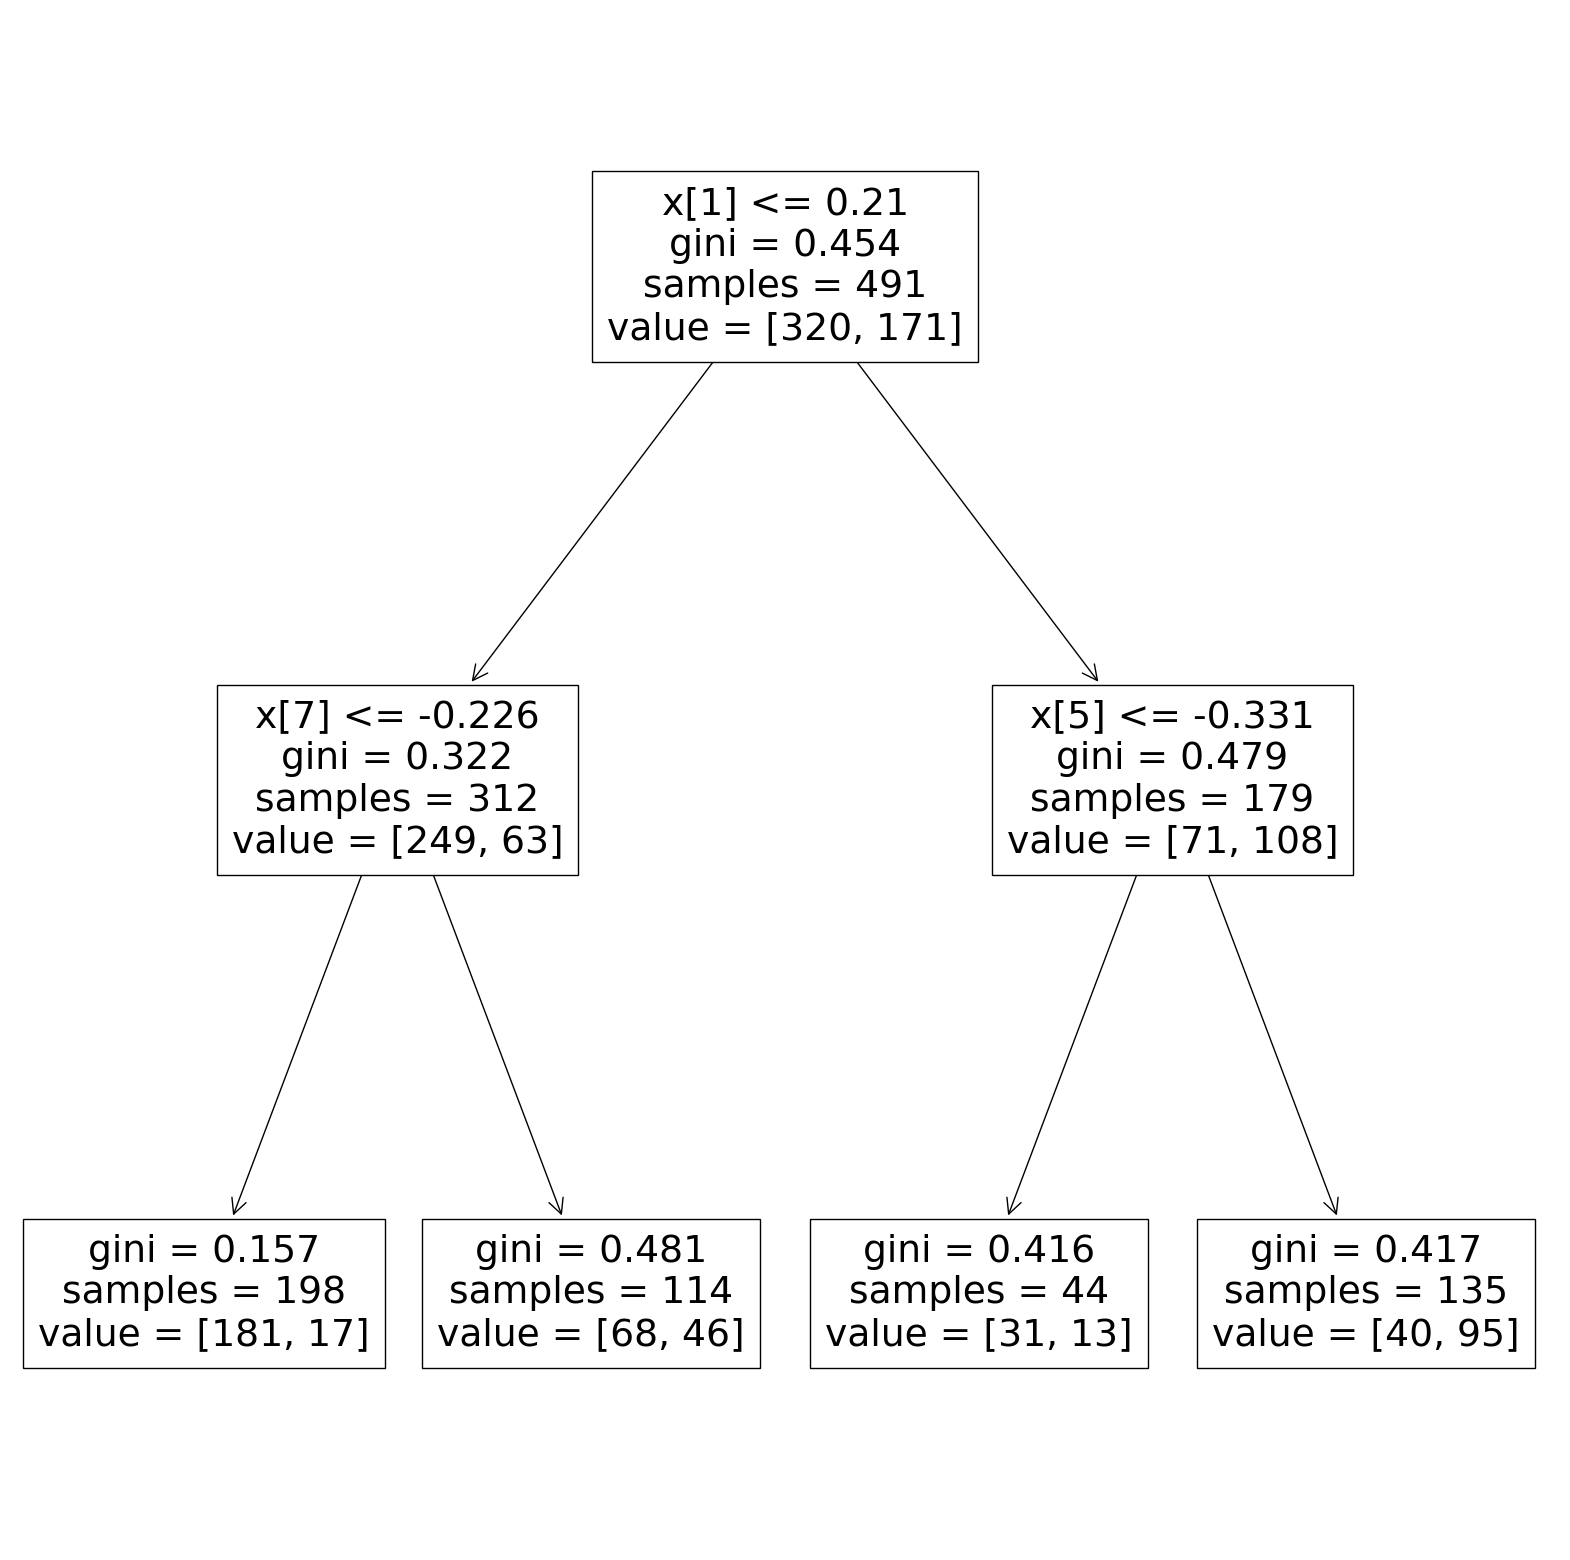

In [113]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf_);